# Modeling a Single Square Assembly

This notebook is intended to demonstrate how to use ROBIN3's [Python API](../pythonapi/index.rst) to simulate a single square assembly. 

In [9]:
%matplotlib inline
import robin3
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
robin3.config.USE_TQDM_NOTEBOOK = True

## Defining Materials

Here we define a [material] (../io_formats/input.rst#material-object) list containing a 3.2% enriched UO2 material as follows:

In [10]:
uo2 = {
    "name": "FUEL",
    "elements": ["UO2_3.2"],
    "weight_percents": [1.0],
    "density": 10.3
}
materials = [uo2]

## Defining Pin Structures

We create a [structure](../io_formats/input.rst#structure-object) list containing 2 pins: a fuel pin and a guide tube.

In [11]:
fuel_cell = {
    "name": "FU",
    "primitives": [
        {"type": "CIRCLE", "radius": 0.4096},
        {"type": "CIRCLE", "radius": 0.4180},
        {"type": "CIRCLE", "radius": 0.4750},
    ],
    "regions": [
        {"material": "FUEL", "space": "1"},
        {"material": "HE", "space": "2-1"},
        {"material": "ZIRLO", "space": "3-2"},
    ]
}
guide_tube = {
    "name": "GT",
    "primitives": [
        {"type": "CIRCLE", "radius": 0.5615},
        {"type": "CIRCLE", "radius": 0.6120},
    ],
    "regions": [
        {"material": "MOD", "space": "1"},
        {"material": "ZIRLO", "space": "2-1"},
    ]
}
structures = [fuel_cell, guide_tube]

Note here material "MOD" is a build-in material, and material "HE" and "ZIRLO" are pre-defined in ROBIN3's [material databank file](../io_formats/materialdb.rst), which can be inspected by [robin3.get_predefined_materials](../pythonapi/generated/robin3.get_predefined_materials.rst) as well.

## Defining Assembly

Here we define a 17x17 square [Assembly](../io_formats/input.rst#assembly-object) and set its key "symmetry" to 8 to reduce the computational burden.

In [12]:
assembly = {
    "name": "single_assembly_example",
    "type": "SQUARE",
    "symmetry": 8,
    "pitch": 21.504,
    "cell_pitch": 1.26,
    "cell_map": [
         "FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU",
         "FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU",
         "FU","FU","FU","FU","FU","GT","FU","FU","GT","FU","FU","GT","FU","FU","FU","FU","FU",
         "FU","FU","FU","GT","FU","FU","FU","FU","FU","FU","FU","FU","FU","GT","FU","FU","FU",
         "FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU",
         "FU","FU","GT","FU","FU","GT","FU","FU","GT","FU","FU","GT","FU","FU","GT","FU","FU",
         "FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU",
         "FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU",
         "FU","FU","GT","FU","FU","GT","FU","FU","GT","FU","FU","GT","FU","FU","GT","FU","FU",
         "FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU",
         "FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU",
         "FU","FU","GT","FU","FU","GT","FU","FU","GT","FU","FU","GT","FU","FU","GT","FU","FU",
         "FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU",
         "FU","FU","FU","GT","FU","FU","FU","FU","FU","FU","FU","FU","FU","GT","FU","FU","FU",
         "FU","FU","FU","FU","FU","GT","FU","FU","GT","FU","FU","GT","FU","FU","FU","FU","FU",
         "FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU",
         "FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU","FU"
    ]
}

## Defining State Points

[State points](../io_formats/input.rst#state-points-object) is required for micro xs cases, here we provides [burnup points](../io_formats/input.rst#burnup-points) and [power density](../io_formats/input.rst#power-density) to perform single assembly depletion calculation:

In [13]:
state_points = {
    "boron_concentration": 500,
    "moderator_temperature": 577,
    "fuel_temperature": 903,
    "system_pressure": 15.51,
    "burnup_points":[0.0,0.03,0.1,0.5,1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,22,24,26,28,30],
    "power_density": 40.0
}

## Composing a Input Model

The full [input model](../io_formats/input.rst) for a typical single assembly depletion calculation includes following parts:
    1. [materials](../io_formats/input.rst#materials-array);
    2. [structures](../io_formats/input.rst#structures-array);
    3. [assemblies](../io_formats/input.rst#assemblies-array);
    4. [state points](../io_formats/input.rst#state-points-object).

In [14]:
model = {
    "materials": materials,
    "structures": structures,
    "assemblies": [assembly],
    "state_points": state_points
}

## Visualizing Input Model

Instantiates a [robin3.plotter](../pythonapi/generated/robin3.Plotter.rst) to visualize the model

In [15]:
plotter = robin3.Plotter(model)

Display our single assembly by plot_geometry method:

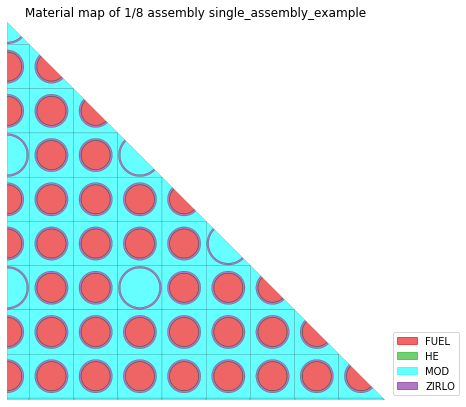

In [16]:
fig = plotter.plot_geometry()

Display our single pin cell assembly with MOC meshing:

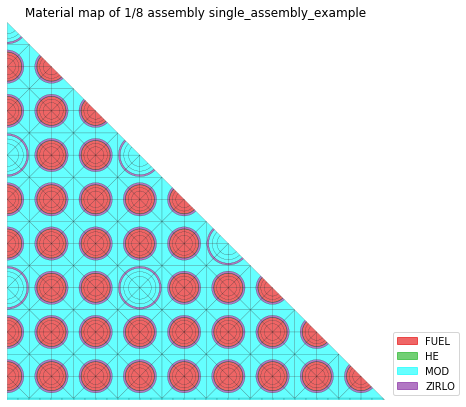

In [17]:
fig = plotter.plot_geometry(show_meshes=True)

Display flat source regions:

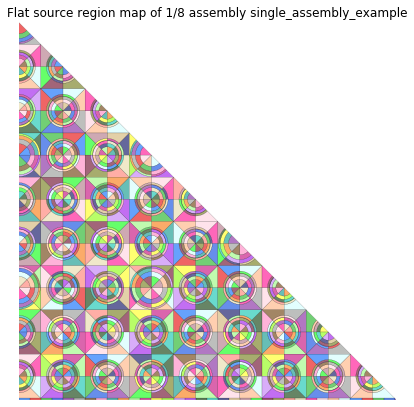

In [18]:
fig = plotter.plot_flat_source_regions()

## Run ROBIN3

Running ROBIN3 from Python can be done using the [robin3.run()](../pythonapi/generated/robin3.run.rst) function. This function allows you to use GPU by setting use_GPU=True if it needed, GPU will significantly reduce the running time.

In [19]:
result = robin3.run(model, use_gpu=True)

In [20]:
print(result)

The [robin3.run()](../pythonapi/generated/robin3.run.rst) function return a [robin3.ResultProcessor](../pythonapi/generated/robin3.ResultProcessor.rst) instance. All the result data can be accessed by the result_data attribute, and the result data are saved by a HDF5 file named by
result_file attribute, summary result data such as keff can be inspected by method summary which return a pandas DataFrame.

In [21]:
print(result.result_file)
df = result.summary()
print(df)

/home/ghchen/Nustar/projects/robin3/docs/source/examples/single_assembly_example.h5
    burnup    tmo    tfu    bor      keff      kinf  keff_apply_buckling  \
0     0.00  577.0  903.0  500.0  1.280854  1.281169             1.281064   
1     0.03  577.0  903.0  500.0  1.247487  1.247513             1.247399   
2     0.10  577.0  903.0  500.0  1.236703  1.236747             1.236621   
3     0.50  577.0  903.0  500.0  1.226461  1.226907             1.226763   
4     1.00  577.0  903.0  500.0  1.217615  1.220810             1.220664   
5     2.00  577.0  903.0  500.0  1.210056  1.210395             1.210247   
6     3.00  577.0  903.0  500.0  1.198770  1.199126             1.198976   
7     4.00  577.0  903.0  500.0  1.186145  1.187387             1.187234   
8     5.00  577.0  903.0  500.0  1.174906  1.175509             1.175354   
9     6.00  577.0  903.0  500.0  1.163465  1.163733             1.163574   
10    7.00  577.0  903.0  500.0  1.151978  1.152231             1.152065   
11  

We can conveniently plot k-effective and peak pin power changes with burnup by using pandas:

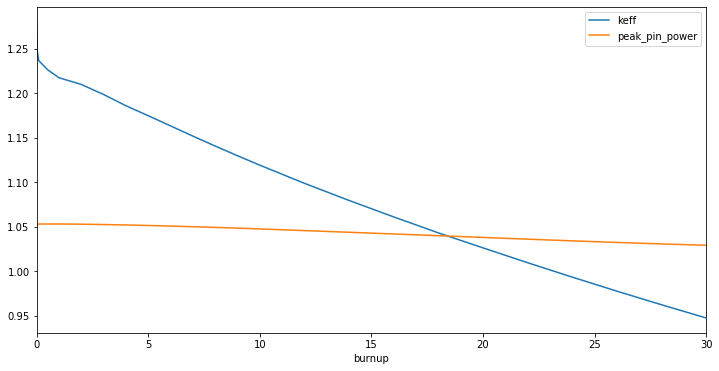

In [22]:
import pandas as pd
df.plot(x="burnup", y=["keff", "peak_pin_power"])

## Result Visualization

Result visualization from Python can be done using a [robin3.Plotter](../pythonapi/generated/robin3.Plotter.rst) instance generate by [ResultProcessor](../pythonapi/generated/robin3.ResultProcessor.rst)'s method generate_plotter.

In [23]:
plotter = result.generate_plotter()

Here we can plot input model as well:

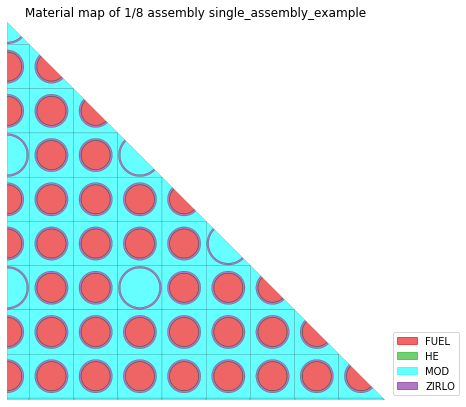

In [24]:
fig = plotter.plot_geometry()

Display depletion and resonance regions:

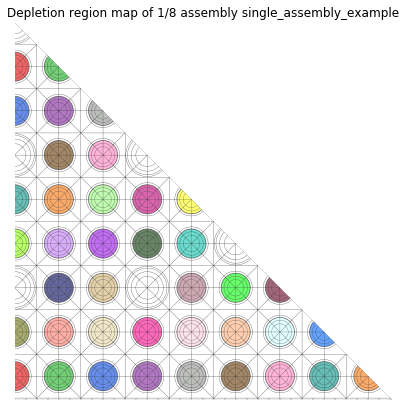

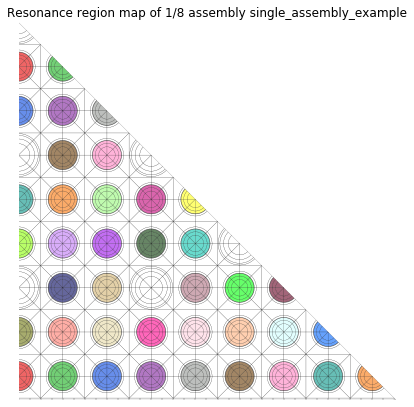

In [25]:
fig = plotter.plot_depletion_regions()
fig = plotter.plot_resonance_regions()

By the figures above we can see depletion regions are the same as the resonance regions in this case. 

Many result items can be displayed by the [robin3.Plotter](../pythonapi/generated/robin3.Plotter.rst) Class. For example, we can plot the pin power distribution at any burnup points that we calculated by plot_pin_power method:

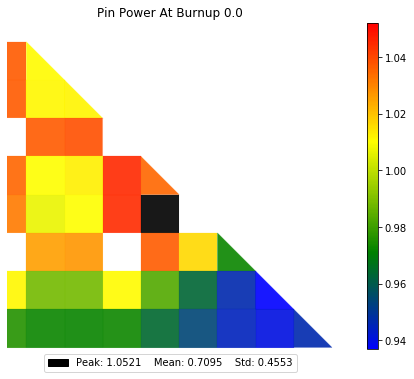

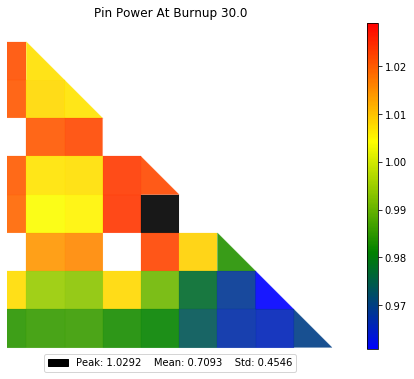

In [26]:
fig = plotter.plot_pin_power(burnup=0.0)
fig = plotter.plot_pin_power(burnup=30.0)

Visualize the mesh flux distribution of energy group 1 (fast group) and 2 (thermal group) at burnup 5.0 GWd/tU:

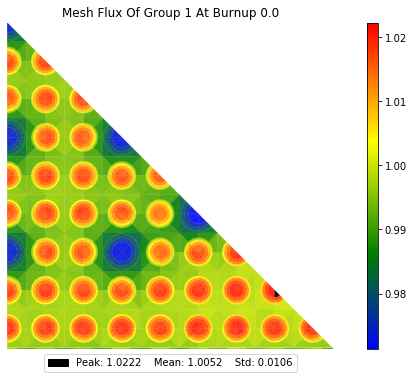

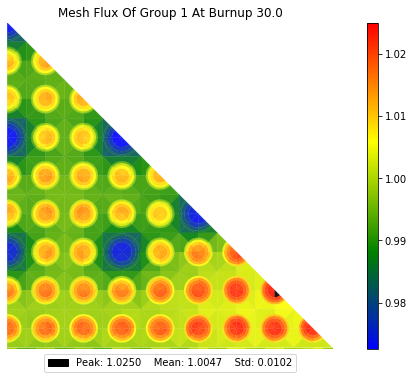

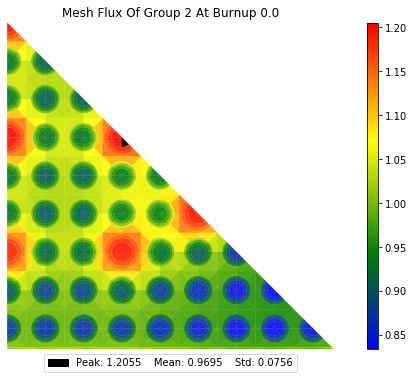

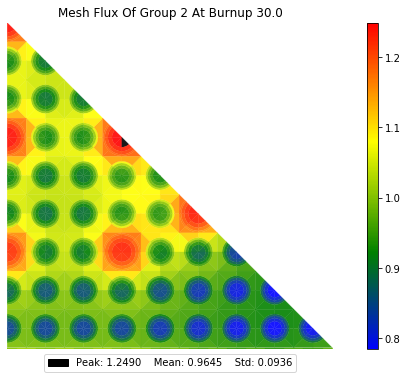

In [27]:
for g in [1, 2]:
    fig = plotter.plot_mesh_flux(group=g, burnup=0.0)
    fig = plotter.plot_mesh_flux(group=g, burnup=30.0)